In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Multi/Base_classifier_result(URL cross).csv")
data.head()

,labels,dt_prediction_non,dt_prediction_phish,dt_prediction_spam,dt_prediction_malware,dt_prediction_defacemen,knn_prediction_non,knn_prediction_phish,knn_prediction_spam,knn_prediction_malware,knn_prediction_defacemen,XGB_prediction_non,XGB_prediction_phish,XGB_prediction_spam,XGB_prediction_malware,XGB_prediction_defacemen
0,0,0.200000,0.706667,0.017778,0.022222,0.053333,1.0,0.0,0.0,0.0,0.0,0.752237,0.186420,0.018277,0.037348,0.005718
1,3,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.004228,0.001896,0.001249,0.992261,0.000365
2,2,0.007828,0.021526,0.947162,0.000000,0.023483,0.0,0.0,1.0,0.0,0.0,0.002879,0.006828,0.976875,0.001858,0.011559
3,4,0.000000,0.001522,0.108067,0.009132,0.881279,0.0,0.0,0.0,0.0,1.0,0.001252,0.002887,0.025582,0.007450,0.962830
4,0,0.992435,0.004127,0.000000,0.003439,0.000000,1.0,0.0,0.0,0.0,0.0,0.990474,0.006491,0.000604,0.002270,0.000161


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    6896 non-null   int64  
 1   dt_prediction_non         6896 non-null   float64
 2   dt_prediction_phish       6896 non-null   float64
 3   dt_prediction_spam        6896 non-null   float64
 4   dt_prediction_malware     6896 non-null   float64
 5   dt_prediction_defacemen   6896 non-null   float64
 6   knn_prediction_non        6896 non-null   float64
 7   knn_prediction_phish      6896 non-null   float64
 8   knn_prediction_spam       6896 non-null   float64
 9   knn_prediction_malware    6896 non-null   float64
 10  knn_prediction_defacemen  6896 non-null   float64
 11  XGB_prediction_non        6896 non-null   float64
 12  XGB_prediction_phish      6896 non-null   float64
 13  XGB_prediction_spam       6896 non-null   float64
 14  XGB_pred

In [5]:
import numpy as np

y_f = data['labels']
x_f = data.drop('labels',axis=1)

x = np.array(x_f)
y = y_f.values



print(x.shape, y.shape)




(6896, 15) (6896,)


In [6]:
# one hot encoding

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

encoder.fit(y)
en_y = encoder.transform(y)
dy = np_utils.to_categorical(en_y)



In [9]:
import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_aa(x_training, x_val, y_training, y_val, opt, early_stopping_monitor):

  model = Sequential()
  model.add(Dense(10, input_dim=15, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer = opt, loss='mse', metrics=["accuracy"])

  # print("check point")
  history = model.fit(x_training, y_training, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()

  print('Validation Accuracy: ')
  y_pred = model.predict(x_val)
  Y_pred_classes = np.argmax(y_pred,axis = 1) 
  Y_true = np.argmax(y_val,axis = 1) 


  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(Y_true, Y_pred_classes))

  #target_names = ['True', 'False']
  print(classification_report(Y_true, Y_pred_classes))


  print(confusion_matrix(Y_true, Y_pred_classes))

  # print('Precision: %.4f' % precision_score(y_val, y_pred))
  # print('Recall: %.4f' % recall_score(y_val, y_pred))
  # print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  # tn, fp, fn, tp = confusion_matrix(list(y_val), list(y_pred), labels=[0, 1]).ravel()

  # print('True Positive', tp)
  # print('True Negative', tn)
  # print('False Positive', fp)
  # print('False Negative', fn)


Epoch 1/100
194/194 [==============================] - 2s 5ms/step - loss: 0.2280 - accuracy: 0.3112 - val_loss: 0.1892 - val_accuracy: 0.6406
Epoch 2/100
194/194 [==============================] - 1s 5ms/step - loss: 0.1532 - accuracy: 0.7963 - val_loss: 0.1223 - val_accuracy: 0.8986
Epoch 3/100
194/194 [==============================] - 1s 4ms/step - loss: 0.1027 - accuracy: 0.8966 - val_loss: 0.0858 - val_accuracy: 0.9217
Epoch 4/100
194/194 [==============================] - 1s 4ms/step - loss: 0.0745 - accuracy: 0.9059 - val_loss: 0.0639 - val_accuracy: 0.9174
Epoch 5/100
194/194 [==============================] - 1s 4ms/step - loss: 0.0570 - accuracy: 0.9114 - val_loss: 0.0495 - val_accuracy: 0.9188
Epoch 6/100
194/194 [==============================] - 1s 4ms/step - loss: 0.0455 - accuracy: 0.9157 - val_loss: 0.0400 - val_accuracy: 0.9232
Epoch 7/100
194/194 [==============================] - 1s 4ms/step - loss: 0.0381 - accuracy: 0.9164 - val_loss: 0.0338 - val_accuracy: 0.9290

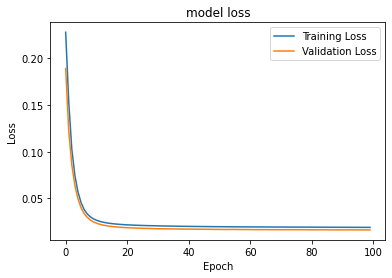

Validation Accuracy: 
Accuracy: 0.9449275362318841
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       215
           1       0.97      0.93      0.95        75
           2       0.92      0.92      0.92       133
           3       0.93      0.97      0.95       162
           4       0.94      0.95      0.95       105

    accuracy                           0.94       690
   macro avg       0.95      0.94      0.94       690
weighted avg       0.95      0.94      0.94       690

[[203   2   3   7   0]
 [  2  70   2   1   0]
 [  2   0 122   3   6]
 [  3   0   2 157   0]
 [  2   0   3   0 100]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1232 - accuracy: 0.7245 - val_loss: 0.0595 - val_accuracy: 0.8580
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 0.8998 - val_loss: 0.0382 - val_accuracy: 0.9116
Epoch 3/100
194/194 [==============================] - 0s 

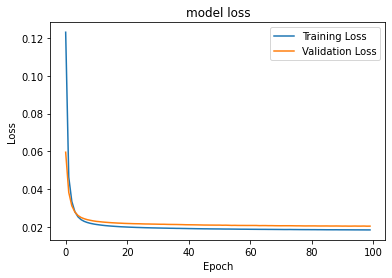

Validation Accuracy: 
Accuracy: 0.9347826086956522
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       241
           1       0.90      0.89      0.89        61
           2       0.91      0.91      0.91       132
           3       0.95      0.91      0.93       151
           4       0.92      0.93      0.92       105

    accuracy                           0.93       690
   macro avg       0.93      0.92      0.92       690
weighted avg       0.93      0.93      0.93       690

[[235   1   2   3   0]
 [  2  54   1   2   2]
 [  2   2 120   1   7]
 [  7   3   3 138   0]
 [  0   0   6   1  98]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1132 - accuracy: 0.7786 - val_loss: 0.0603 - val_accuracy: 0.9130
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9233 - val_loss: 0.0337 - val_accuracy: 0.9217
Epoch 3/100
194/194 [==============================] - 0s 

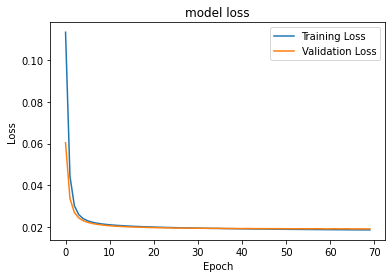

Validation Accuracy: 
Accuracy: 0.9289855072463769
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       236
           1       0.90      0.82      0.86        74
           2       0.91      0.90      0.90       135
           3       0.95      0.93      0.94       153
           4       0.88      0.92      0.90        92

    accuracy                           0.93       690
   macro avg       0.92      0.91      0.91       690
weighted avg       0.93      0.93      0.93       690

[[232   1   1   1   1]
 [  5  61   5   2   1]
 [  1   1 121   2  10]
 [  4   4   3 142   0]
 [  0   1   3   3  85]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1395 - accuracy: 0.6255 - val_loss: 0.0757 - val_accuracy: 0.9159
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9125 - val_loss: 0.0407 - val_accuracy: 0.9246
Epoch 3/100
194/194 [==============================] - 0s 

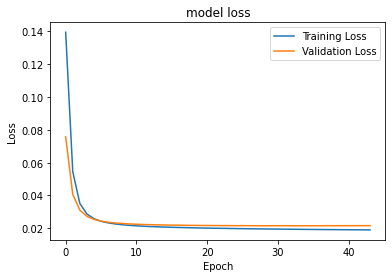

Validation Accuracy: 
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       215
           1       0.88      0.85      0.87        72
           2       0.91      0.91      0.91       147
           3       0.95      0.92      0.94       170
           4       0.94      0.94      0.94        86

    accuracy                           0.93       690
   macro avg       0.93      0.92      0.92       690
weighted avg       0.93      0.93      0.93       690

[[211   1   1   2   0]
 [  1  61   7   3   0]
 [  3   3 134   2   5]
 [  8   4   1 157   0]
 [  0   0   4   1  81]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1164 - accuracy: 0.7971 - val_loss: 0.0602 - val_accuracy: 0.9116
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9227 - val_loss: 0.0361 - val_accuracy: 0.9188
Epoch 3/100
194/194 [==============================] - 0s 

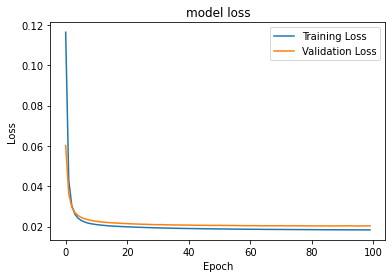

Validation Accuracy: 
Accuracy: 0.9347826086956522
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       222
           1       0.95      0.89      0.92        82
           2       0.88      0.95      0.91       119
           3       0.93      0.93      0.93       150
           4       0.95      0.90      0.92       117

    accuracy                           0.93       690
   macro avg       0.93      0.93      0.93       690
weighted avg       0.94      0.93      0.93       690

[[215   0   3   4   0]
 [  2  73   2   4   1]
 [  0   0 113   1   5]
 [  5   3   3 139   0]
 [  3   1   7   1 105]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1330 - accuracy: 0.8078 - val_loss: 0.0672 - val_accuracy: 0.9029
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9167 - val_loss: 0.0421 - val_accuracy: 0.9101
Epoch 3/100
194/194 [==============================] - 0s 

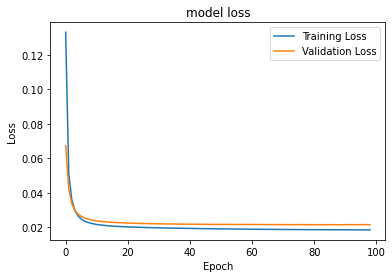

Validation Accuracy: 
Accuracy: 0.9246376811594202
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       226
           1       0.90      0.88      0.89        68
           2       0.91      0.93      0.92       140
           3       0.95      0.92      0.94       156
           4       0.88      0.92      0.90       100

    accuracy                           0.92       690
   macro avg       0.92      0.92      0.92       690
weighted avg       0.93      0.92      0.92       690

[[212   6   1   4   3]
 [  2  60   2   2   2]
 [  3   0 130   1   6]
 [  5   1   4 144   2]
 [  1   0   6   1  92]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1207 - accuracy: 0.6800 - val_loss: 0.0735 - val_accuracy: 0.8287
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.8439 - val_loss: 0.0501 - val_accuracy: 0.8374
Epoch 3/100
194/194 [==============================] - 0s 

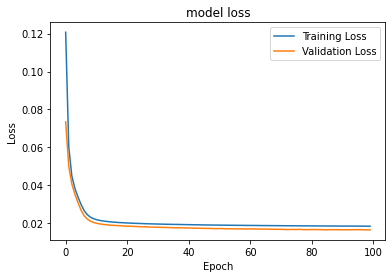

Validation Accuracy: 
Accuracy: 0.9433962264150944
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       248
           1       0.94      0.86      0.90        79
           2       0.89      0.94      0.91       115
           3       0.95      0.97      0.96       144
           4       0.92      0.90      0.91       103

    accuracy                           0.94       689
   macro avg       0.94      0.93      0.93       689
weighted avg       0.94      0.94      0.94       689

[[242   3   2   1   0]
 [  2  68   3   4   2]
 [  1   0 108   0   6]
 [  1   1   3 139   0]
 [  2   0   6   2  93]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1481 - accuracy: 0.7076 - val_loss: 0.0786 - val_accuracy: 0.8853
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9154 - val_loss: 0.0442 - val_accuracy: 0.9187
Epoch 3/100
194/194 [==============================] - 0s 

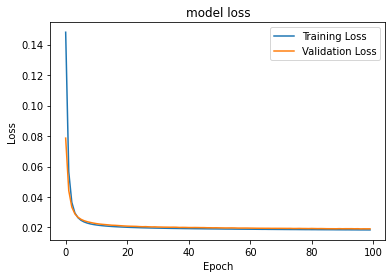

Validation Accuracy: 
Accuracy: 0.9346879535558781
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       201
           1       0.91      0.85      0.88        74
           2       0.93      0.92      0.93       139
           3       0.98      0.92      0.95       172
           4       0.92      0.96      0.94       103

    accuracy                           0.93       689
   macro avg       0.93      0.93      0.93       689
weighted avg       0.94      0.93      0.93       689

[[195   3   3   0   0]
 [  7  63   1   1   2]
 [  1   1 128   2   7]
 [  8   2   3 159   0]
 [  2   0   2   0  99]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1105 - accuracy: 0.7036 - val_loss: 0.0641 - val_accuracy: 0.8636
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.8956 - val_loss: 0.0439 - val_accuracy: 0.9173
Epoch 3/100
194/194 [==============================] - 0s 

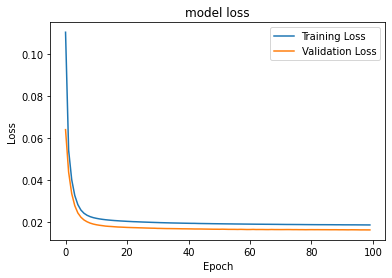

Validation Accuracy: 
Accuracy: 0.9477503628447025
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       230
           1       0.95      0.90      0.92        59
           2       0.94      0.94      0.94       143
           3       0.95      0.95      0.95       153
           4       0.94      0.95      0.95       104

    accuracy                           0.95       689
   macro avg       0.95      0.94      0.94       689
weighted avg       0.95      0.95      0.95       689

[[222   2   1   3   2]
 [  1  53   2   1   2]
 [  2   1 134   4   2]
 [  7   0   1 145   0]
 [  0   0   5   0  99]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1438 - accuracy: 0.5959 - val_loss: 0.0767 - val_accuracy: 0.9289
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9225 - val_loss: 0.0383 - val_accuracy: 0.9347
Epoch 3/100
194/194 [==============================] - 0s 

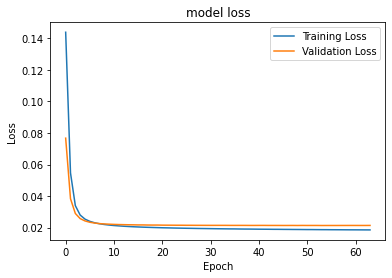

Validation Accuracy: 
Accuracy: 0.9288824383164006
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       236
           1       0.87      0.83      0.85        58
           2       0.91      0.92      0.92       139
           3       0.94      0.95      0.95       154
           4       0.90      0.86      0.88       102

    accuracy                           0.93       689
   macro avg       0.92      0.91      0.91       689
weighted avg       0.93      0.93      0.93       689

[[229   1   1   3   2]
 [  4  48   3   2   1]
 [  1   1 128   2   7]
 [  2   3   2 147   0]
 [  4   2   6   2  88]]


In [10]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)


kf = KFold(n_splits=10, random_state=10, shuffle=True)
for train, val in kf.split(x, dy):
  model_aa(x[train], x[val], dy[train], dy[val], optimizer1, early_stopping_monitor)